# Simple water flow example using ANUGA

Water driven up a linear slope and time varying boundary,
similar to a beach environment

## Import necessary modules

In [11]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt 
import numpy as np
plt.style.use('ggplot')
%matplotlib inline         

In [12]:
import anuga

from math import sin, pi, exp

## Setup computational domain

In [2]:
points, vertices, boundary = anuga.rectangular_cross(10, 10) # Basic mesh

domain = anuga.Domain(points, vertices, boundary)   # Create domain
domain.set_name('runup')                            # Output to file runup.sww
domain.set_datadir('.')                             # Use current folder

## Setup initial conditions

In [3]:
def topography(x, y):
    return -x/2                              # linear bed slope
    #return x*(-(2.0-x)*.5)                  # curved bed slope

In [4]:
domain.set_quantity('elevation', topography) # Use function for elevation
domain.set_quantity('friction', 0.1)         # Constant friction 
domain.set_quantity('stage', -0.4)           # Constant negative initial stage

## Setup boundary conditions

In [5]:
Br = anuga.Reflective_boundary(domain)      # Solid reflective wall
Bt = anuga.Transmissive_boundary(domain)    # Continue all values on boundary 
Bd = anuga.Dirichlet_boundary([-0.2,0.,0.]) # Constant boundary values
Bw = anuga.Time_boundary(domain=domain,     # Time dependent boundary  
                   function=lambda t: [(0.1*sin(t*2*pi)-0.3)*exp(-t), 0.0, 0.0])

In [6]:
# Associate boundary tags with boundary objects
domain.set_boundary({'left': Br, 'right': Bw, 'top': Br, 'bottom': Br})

In [7]:
#------------------------------------------------------------------------------
# Evolve system through time
#------------------------------------------------------------------------------
for t in domain.evolve(yieldstep=0.1, finaltime=10.0):
    print domain.timestepping_statistics()

# Process results

In [8]:
out = anuga.utilities.plot_utils.get_output('runup.sww') #vertex values
outc =  anuga.utilities.plot_utils.get_centroids(out) #centroid values

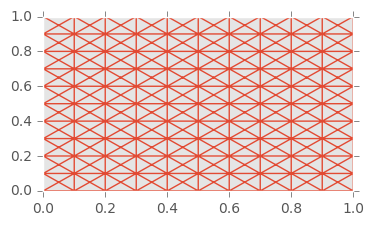

In [13]:
triang = tri.Triangulation(out.x,out.y,out.vols)
plt.figure(figsize=(4,2.25))
plt.triplot(triang)

In [15]:
tr = anuga.utilities.plot_utils.near_transect(out,[0,0.5],[1.0,0.5])

In [16]:
tr = list(tr)
sorting = np.argsort(tr[1])
tr[1] = tr[1][sorting]
tr[0] = tr[0][sorting]

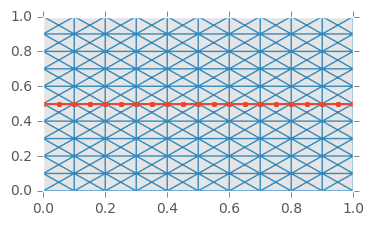

In [18]:
plt.figure(figsize=(4,2.25))
plt.plot(tr[1],np.ones_like(tr[1])*0.5,'.-')
plt.triplot(triang)


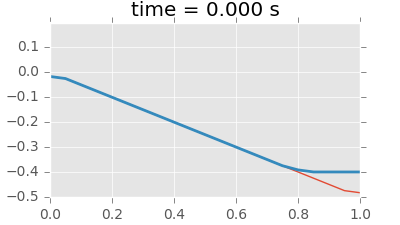
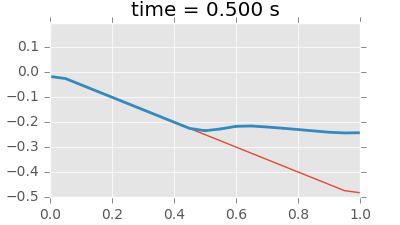
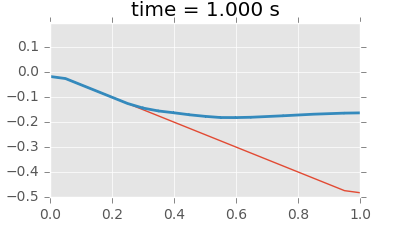
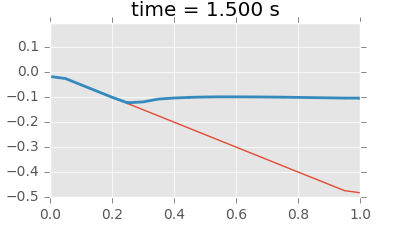
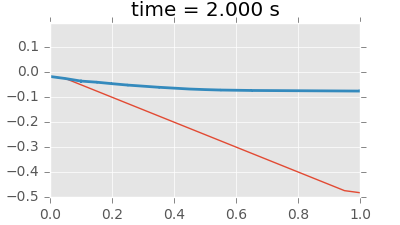
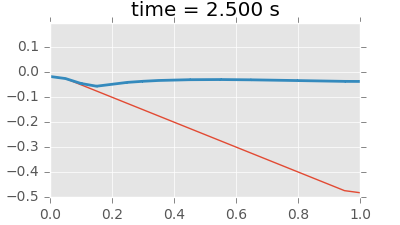
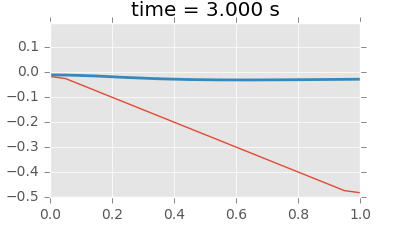
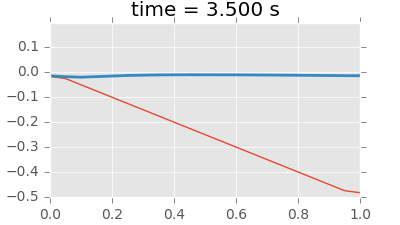
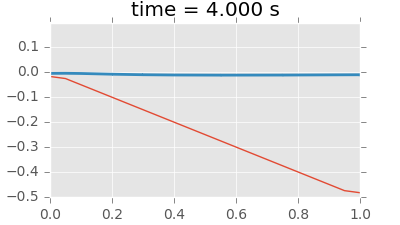
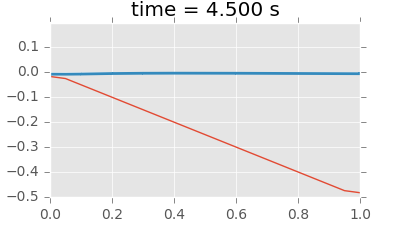
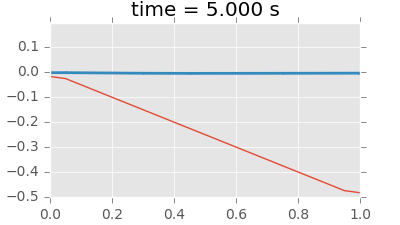
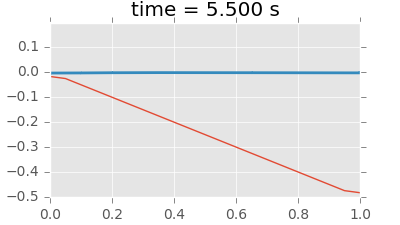
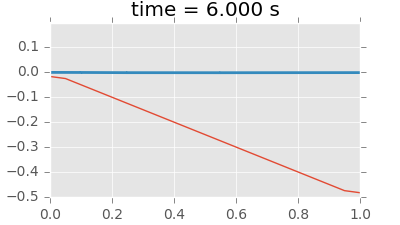
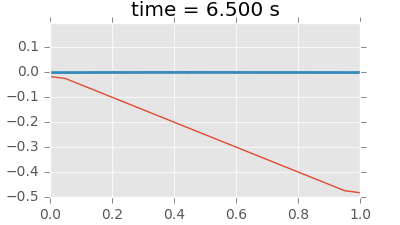
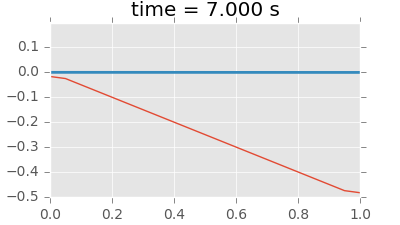
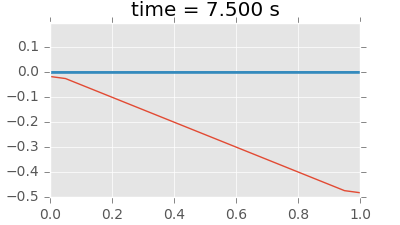
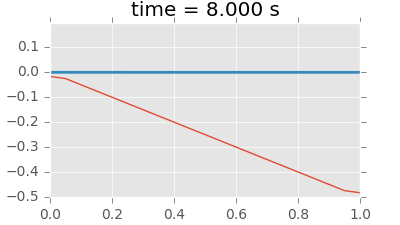
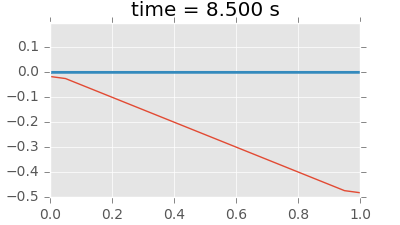
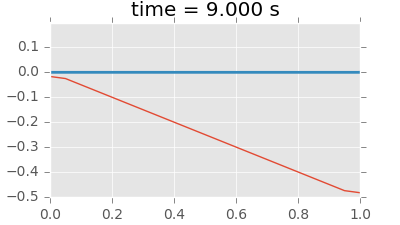
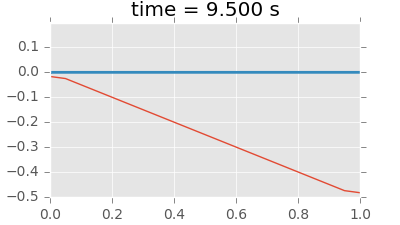

In [24]:
from JSAnimation import IPython_display
from matplotlib import animation

fig = plt.figure(figsize=(4,2.25))
ax = plt.subplot(111)
ax.plot(tr[1], out.elev[tr[0]])
line, = ax.plot([], [], lw=2)
ttl = ax.set_title('time = 0.0 s')
ax.set_ylim(-0.5,0.2)
def animate(i):
    line.set_data(tr[1],out.stage[i*int(out.stage.shape[0]/20.),tr[0]])
    ttl.set_text('time = %.3f s'%out.time[i*int(out.stage.shape[0]/20.)])
    
    return line,

animation.FuncAnimation(fig, animate, frames=20, interval=200, blit=True)